<h1 align="center">
<img src="https://raw.githubusercontent.com/SciQLop/speasy/main/logo/logo_speasy.svg" width="300">
</h1><br>

# Space Physics made EASY

[![Chat on Matrix](https://img.shields.io/matrix/speasy:matrix.org)](https://matrix.to/#/#speasy:matrix.org)
[![image](https://img.shields.io/pypi/v/speasy.svg)](https://pypi.python.org/pypi/speasy)
[![image](https://github.com/SciQLop/speasy/workflows/Tests/badge.svg)](https://github.com/SciQLop/speasy/actions?query=workflow%3A%22Tests%22)
[![Documentation Status](https://readthedocs.org/projects/speasy/badge/?version=latest)](https://speasy.readthedocs.io/en/latest/?badge=latest)
[![Coverage Status](https://codecov.io/gh/SciQLop/speasy/coverage.svg?branch=main)](https://codecov.io/gh/SciQLop/speasy/branch/main)
[![CodeQL](https://github.com/SciQLop/speasy/actions/workflows/codeql.yml/badge.svg)](https://github.com/SciQLop/speasy/actions/workflows/codeql.yml)
[![Zendoo DOI](https://zenodo.org/badge/DOI/10.5281/zenodo.4118780.svg)](https://doi.org/10.5281/zenodo.4118780)
[![Discover on MyBinder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/SciQLop/speasy/main?labpath=docs/examples)
[![Discover on Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/SciQLop/speasy)
[![Speasy proxy uptime (30 days)](https://img.shields.io/uptimerobot/ratio/m792771930-24b7f89c03d5090a13462b70)](http://sciqlop.lpp.polytechnique.fr/cache)

Speasy is a free and open-source Python package that makes it easy to find and load space physics data from a variety of
data sources, whether it is online and public such as [CDAWEB](https://cdaweb.gsfc.nasa.gov/index.html/) and [AMDA](http://amda.irap.omp.eu/),
or any described archive, local or remote.
This task, where any science project starts, would seem easy a priori but, considering the very
diverse array of missions and instrument nowaday available, proves to be one of the major bottleneck,
especially for students and newcomers.
Speasy solves this problem by providing a **single, easy-to-use interface to over 70 space missions and 65,000 products**.

Don't want to write code? See our graphical interface [SciQLop](https://github.com/SciQLop/SciQLop).

## Main features

-   Simple and intuitive API (`spz.get_data(...)` to get them all)
-   Speasy variables are like Pandas DataFrame with seemless conversion to/from it (as long as the shape is compatible)
-   Speasy variables support numpy operations, [see numpy operations example below](#numpy-operations)
-   Speasy variables filtering and resampling capabilities, [see resampling example below](#resampling)
-   Local cache to avoid redundant downloads
-   Uses the SciQLOP ultra fast community cache server
-   Full support of [AMDA](http://amda.irap.omp.eu/) API
-   Can retrieve time-series from [AMDA](http://amda.irap.omp.eu/),
    [CDAWeb](https://cdaweb.gsfc.nasa.gov/),
    [CSA](https://csa.esac.esa.int/csa-web/),
    [SSCWeb](https://sscweb.gsfc.nasa.gov/)
-   Support data access from any local or remote archives described by YAML file.

## Help us improve Speasy!

We want Speasy to be the best possible tool for space physics research. You can help us by:

- Answering our user survey [here](https://docs.google.com/forms/d/e/1FAIpQLScV12kvETk8jc4Zc4sIsHiteMHRVo5I8DiSAE8RyVdVkUaxJA/viewform?usp=sf_link).
- Reporting bugs or requesting features [here](https://github.com/SciQLop/speasy/issues/new).
- Creating or participating in discussions [here](https://github.com/SciQLop/speasy/discussions).

Your feedback is essential to making Speasy a better tool for everyone.

## Quickstart
### Installation

Installing Speasy with pip ([more details here](https://speasy.readthedocs.io/en/stable/installation.html)):

``` console
$ python -m pip install speasy
# or
$ python -m pip install --user speasy
```

### Examples
#### Simple request

This simple code example shows how easy it is to get data using Speasy. The code imports the Speasy package and defines a variable named ace_mag. This variable stores the data for the ACE IMF product, for the time period from June 2, 2016 to June 5, 2016. The code then uses the Speasy plot() function to plot the data.

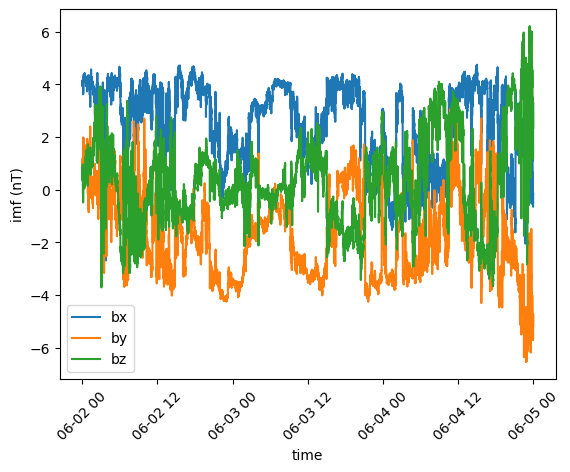

In [1]:
import speasy as spz
ace_mag = spz.get_data('amda/imf', "2016-6-2", "2016-6-5")
ace_mag.plot();

#### Using the dynamic inventory

Where amda is the webservice and imf is the product id you will get with
this request.

Using the dynamic inventory will produce the same result as the previous example, but it has the advantage of being easier to manipulate, since you can discover available data from your favorite Python environment completion tool, such as IPython or notebooks.

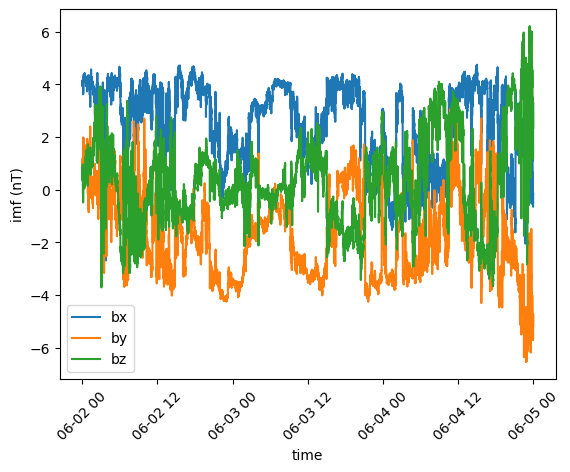

In [2]:
import speasy as spz
amda_tree = spz.inventories.data_tree.amda
ace_mag = spz.get_data(amda_tree.Parameters.ACE.MFI.ace_imf_all.imf, "2016-6-2", "2016-6-5")
ace_mag.plot();

#### Plotting multiple time series on a single figure

This code example shows how to use Speasy to plot multiple time series of space physics data from the **MMS1** spacecraft on a single figure, with a shared x-axis. The code imports the Speasy package and the [Matplotlib](https://matplotlib.org/stable/) plotting library. It then creates a figure with six subplots, arranged in a single column. Next, it defines a list of products and axes to plot. Finally, it iterates over the list of products and axes, plotting each product on the corresponding axis. The code uses the Speasy [get_data()](https://speasy.readthedocs.io/en/latest/dev/speasy.html#speasy.get_data) function to load the data for each product, and the [replace_fillval_by_nan()](https://speasy.readthedocs.io/en/latest/dev/speasy.html#speasy.SpeasyVariable.replace_fillval_by_nan) function to replace any fill values with NaNs.

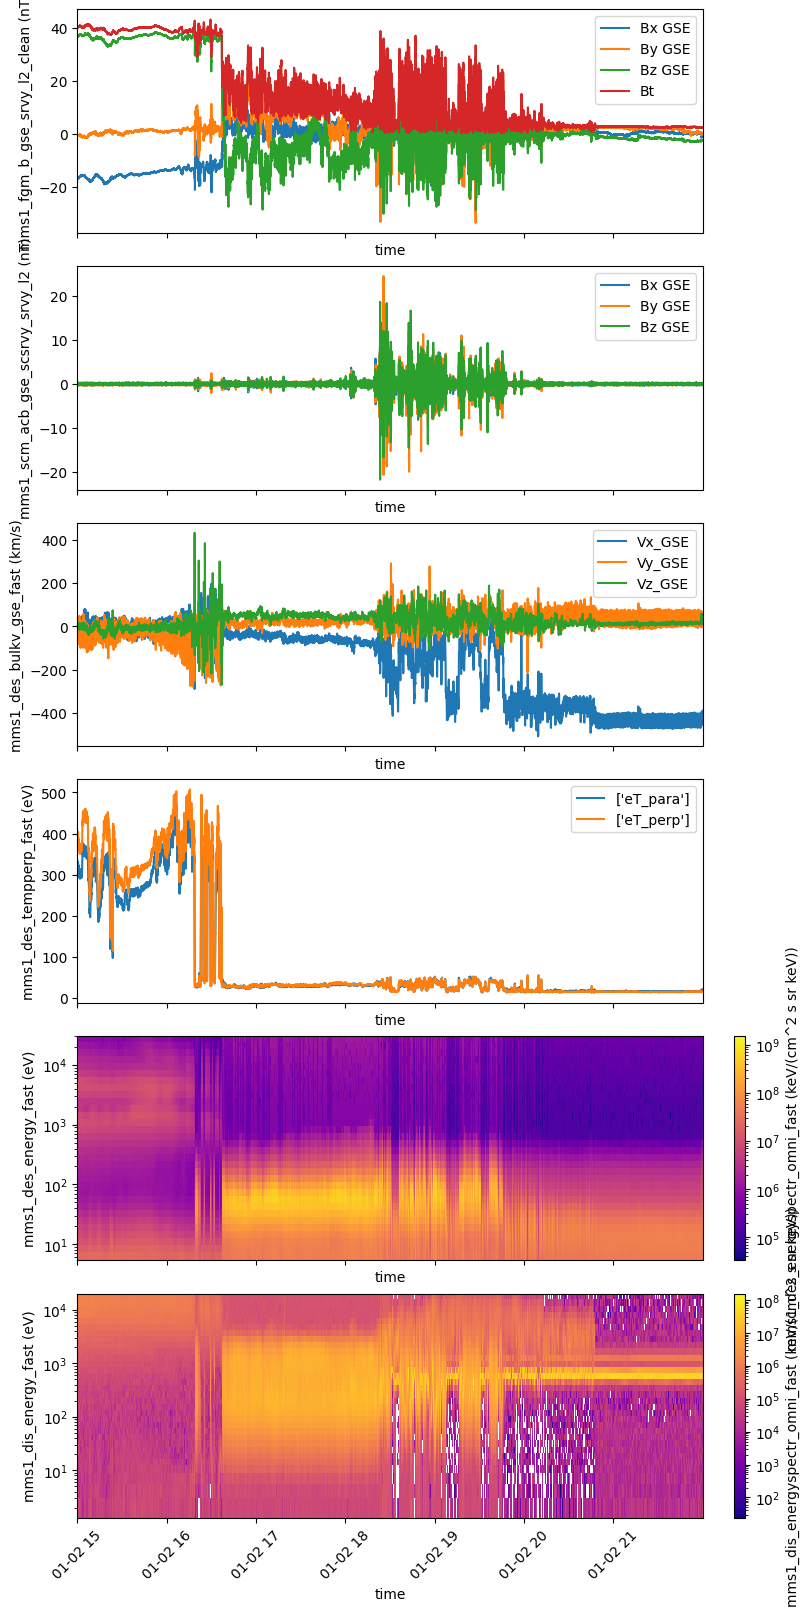

In [3]:
import speasy as spz
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(8, 16), layout="constrained")
gs = fig.add_gridspec(6, hspace=0, wspace=0)
axes = gs.subplots(sharex=True)

plots = [
    (spz.inventories.tree.cda.MMS.MMS1.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gse_srvy_l2_clean, axes[0]),
    (spz.inventories.tree.cda.MMS.MMS1.SCM.MMS1_SCM_SRVY_L2_SCSRVY.mms1_scm_acb_gse_scsrvy_srvy_l2 , axes[1]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_bulkv_gse_fast, axes[2]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_temppara_fast, axes[3]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_tempperp_fast, axes[3]),
    (spz.inventories.tree.cda.MMS.MMS1.DES.MMS1_FPI_FAST_L2_DES_MOMS.mms1_des_energyspectr_omni_fast, axes[4]),
    (spz.inventories.tree.cda.MMS.MMS1.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_energyspectr_omni_fast, axes[5])
]

def plot_product(product, ax):
    values = spz.get_data(product, "2019-01-02T15", "2019-01-02T22")
    values.replace_fillval_by_nan().plot(ax=ax)

for p in plots:
    plot_product(p[0], p[1])

plt.show()

#### Requesting multiple products and intervals at once

More complex requests like this one are supported:

In [4]:
import speasy as spz
products = [
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_vth,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_pdyn,
    spz.inventories.tree.amda.Parameters.Wind.SWE.wnd_swe_kp.wnd_swe_n,
    spz.inventories.tree.cda.Wind.WIND.MFI.WI_H2_MFI.BGSE,
    spz.inventories.tree.ssc.Trajectories.wind,
]
intervals = [["2010-01-02", "2010-01-02T10"], ["2009-08-02", "2009-08-02T10"]]
data = spz.get_data(products, intervals)
data

[[<speasy.products.variable.SpeasyVariable at 0x7f82b21d4400>,

#### Numpy operations

Speasy variables support numpy operations, as shown in this example. The code imports the Speasy package and the NumPy library, and uses the Speasy [get_data()](https://speasy.readthedocs.io/en/latest/dev/speasy.html#speasy.get_data) function to load the magnetic field data for the MMS1 spacecraft for the time period from January 1, 2017 to January 1, 2017. The code then uses the NumPy [sqrt()](https://numpy.org/doc/stable/reference/generated/numpy.sqrt.html) and [sum()](https://numpy.org/doc/stable/reference/generated/numpy.sum.html) functions to compute the norm of the magnetic field vector. Finally, the code uses the NumPy [allclose()](https://numpy.org/doc/stable/reference/generated/numpy.allclose.html) function to check if the computed norm is close to the provided total magnetic field norm (Bt) values.

In [5]:
import speasy as spz
import numpy as np
mms1_products = spz.inventories.tree.cda.MMS.MMS1
b = spz.get_data(mms1_products.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gsm_srvy_l2, '2017-01-01T02:00:00', '2017-01-01T02:00:15')
b.replace_fillval_by_nan(inplace=True)  # replace fill values by NaN
bt = b["Bt"]
b = b["Bx GSM", "By GSM", "Bz GSM"]
computed_norm = np.sqrt(np.sum(b ** 2, axis=1))
print(f"Type of b: {type(b)}\nType of computed_norm: {type(computed_norm)}\nType of bt: {type(bt)}")
print(f"Is the computed norm close to the provided total magnetic field norm? {np.allclose(computed_norm, bt)}")

Type of b: <class 'speasy.products.variable.SpeasyVariable'>
Type of computed_norm: <class 'speasy.products.variable.SpeasyVariable'>
Type of bt: <class 'speasy.products.variable.SpeasyVariable'>
Is the computed norm close to the provided total magnetic field norm? True


#### Resampling

Speasy provides a simple way to filter and resample data. In this example, the code imports the Speasy package and the [Matplotlib](https://matplotlib.org/stable/) plotting library. It then uses the Speasy [get_data()](https://speasy.readthedocs.io/en/latest/dev/speasy.html#speasy.get_data) function to load the magnetic field and temperature data for the MMS1 spacecraft for the time period from January 1, 2017 to January 1, 2017. The code then uses the Speasy [interpolate()](https://speasy.readthedocs.io/en/latest/dev/speasy.signal.resampling.html#speasy.signal.resampling.interpolate) function to interpolate the temperature data to match the magnetic field data sampling rate. Finally, the code plots the magnetic field and temperature data on the same figure.

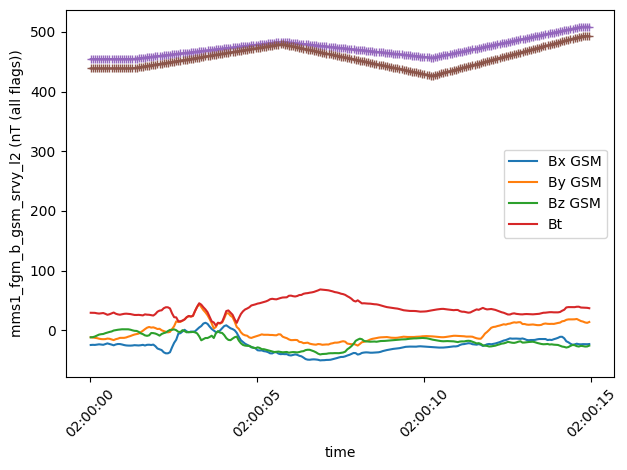

In [6]:
import speasy as spz
from speasy.signal.resampling import interpolate
import matplotlib.pyplot as plt
mms1_products = spz.inventories.tree.cda.MMS.MMS1

b, Tperp, Tpara = spz.get_data(
        [
            mms1_products.FGM.MMS1_FGM_SRVY_L2.mms1_fgm_b_gsm_srvy_l2,
            mms1_products.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_tempperp_fast,
            mms1_products.DIS.MMS1_FPI_FAST_L2_DIS_MOMS.mms1_dis_temppara_fast
        ],
        '2017-01-01T02:00:00',
        '2017-01-01T02:00:15'
    )


Tperp_interp, Tpara_interp = interpolate(b, [Tperp, Tpara])

plt.figure()
ax = b.plot()
plt.plot(Tperp_interp.time, Tperp_interp.values, marker='+')
plt.plot(Tpara_interp.time, Tpara_interp.values, marker='+')
plt.tight_layout()

### Documentation and examples

Check out [Speasy documentation](https://speasy.readthedocs.io/en/stable/) and [examples](https://speasy.readthedocs.io/en/latest/examples/index.html).

### Caveats

-   Speasy is not a plotting package.
    basic plotting capabilities are here for illustration purposes and making quick-and-dirty plots.
    It is not meant to produce publication ready figures, prefer using Matplotlib directly for example.

### Credits

The development of Speasy is supported by the [CDPP](http://www.cdpp.eu/).

This package was created with
[Cookiecutter](https://github.com/audreyr/cookiecutter) and the
[audreyr/cookiecutter-pypackage](https://github.com/audreyr/cookiecutter-pypackage)
project template.
